# задание № 1
Реализовать алгоритм эмпирического упорядочивания вероятностей элементарных
событий, не изменяющихся в процессе испытаний (3.3.2, 3.3.3), с возможностью
задавать вероятность, контролировавшую исход испытаний. Результатом работы
программы должны быть:  
1. упорядоченная по вероятности последовательность элементарных событий
2. график зависимости числа элементарных событий, решение об упорядоченности
которых принято, от номера итерации  
3. интервальные оценки вероятностей элементарных событий  

p 253-259


In [112]:
import numpy as np
from tqdm import tqdm 
import matplotlib.pyplot as plt
from numba import jit

n незав. испытаний  
s элементарных событий  
сравнить элементарные события по вероятности $pr_i \ ? \ pr_j$  
всего $\frac{1}{2}s(s-1)$ пар, которые нужно сравнить

In [113]:
N = 10
Omega = np.arange(start=0,stop=N)
Omega

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [116]:
def Gauss(x,mu,sigma):
    return np.exp(-np.square((x-mu)/sigma))/np.sqrt(2*np.pi*np.square(sigma))+1/N

def Proba(index, supp):
    a = supp[0]
    b = supp[-1]
    N = len(supp)
    mu = int((b+a)/2)
    sigma = np.maximum(int(np.abs((b+a))/10),1)
    norm = 0
    for i in range(len(supp)):
        norm += Gauss(supp[i],mu,sigma)
    return Gauss(supp[index], mu,sigma)/norm

# возможность задавать вероятность, контролировавшую исход испытаний

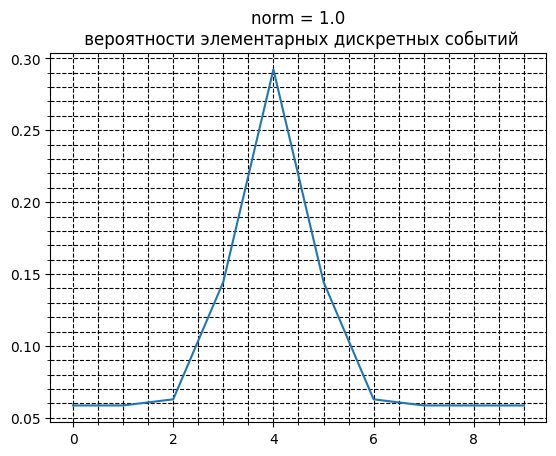

In [190]:
fig,ax = plt.subplots()
x_ = Omega 
y_ = [Proba(i,x_) for i in range(len(x_))]
ax.plot(x_,y_)
ax.set_title(f'norm = {np.sum(y_)}\n вероятности элементарных дискретных событий')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')

In [354]:
NU = np.zeros(shape=(N,N))
n = 100000
delta = 0.5
impirical_cnt = {el:0.0 for el in Omega}
number_of_decisions = []
iter_number= []
delta_vec = []
total_cnt = 0
alpha = 0.01
pairs_number= int(N*(N-1)/2)
bad_predict_probas = np.zeros(shape=(N,N))
mean_predict_probas = []
proba_at_least_one_error = []
for i in range(N):
    for j in range(i+1):
        bad_predict_probas[i][j]=np.nan
for ITER in tqdm(range(n)):
    # delta = delta*0.999
    delta = np.sqrt(-2.0/(ITER+1)*np.log(alpha))
    event = np.random.choice(Omega,size=1,p=y_)[0]
    impirical_cnt[event] += 1.0
    total_cnt += 1.0
    for another_event in Omega:
        if another_event <= event:
            continue            
        NU[event][another_event] = impirical_cnt[event]-impirical_cnt[another_event]
    NU = NU/total_cnt
    not_decision_cnt = 0
    for i in range(N):
        for j in range(i+1,N):
            if NU[i][j] > delta:
                bad_predict_probas[i][j] = np.exp(-(ITER+1)*np.square(delta)/2.0)
            elif NU[i][j] < -delta:
                bad_predict_probas[i][j] = np.exp(-(ITER+1)*np.square(delta)/2.0)
            elif np.abs(NU[i][j]) <= delta:
                not_decision_cnt+=1 
    number_of_decisions.append(pairs_number-not_decision_cnt)
    mean_predict_probas.append(np.nanmean(bad_predict_probas))
    proba_at_least_one_error.append(1.0/(N-1)*np.exp(-(ITER+1)*np.square(delta)/2.0))
    iter_number.append(ITER)
    delta_vec.append(delta)
    if not_decision_cnt == 0:
        print('ordered')
        break
proba_at_least_one_error = np.asarray(proba_at_least_one_error)
number_of_decisions = np.asarray(number_of_decisions)
iter_number = np.asarray(iter_number)
delta_vec = np.asarray(delta_vec)
bad_predict_probas = np.asarray(bad_predict_probas)
delta_last = delta_vec[-1]

  0%|          | 0/100000 [00:00<?, ?it/s]

100%|██████████| 100000/100000 [00:11<00:00, 8884.09it/s]


# график зависимости числа элементарных событий, решение об упорядоченности которых принято, от номера итерации  

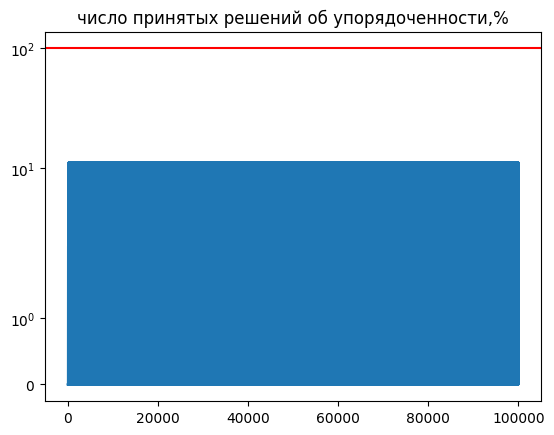

In [355]:
fig,ax = plt.subplots()
ax.plot(iter_number, number_of_decisions/pairs_number*100)
ax.set_title(f'число принятых решений об упорядоченности,%')
ax.axhline(100,c='r')
ax.set_yscale('symlog')

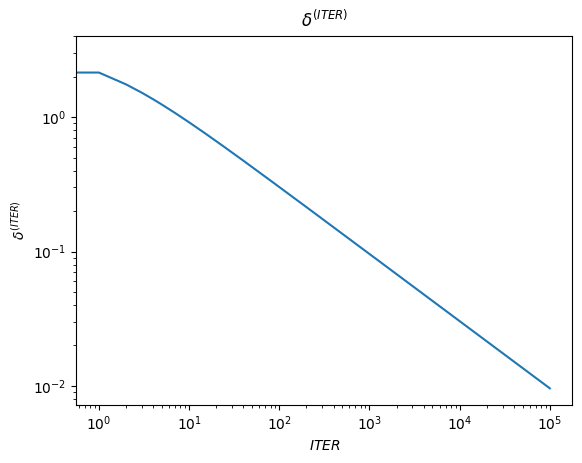

In [356]:
fig,ax = plt.subplots()
ax.plot(iter_number, delta_vec)
ax.set_title(r'$\delta^{(ITER)}$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel(r'$ITER$')
ax.set_ylabel(r'$\delta^{(ITER)}$')
print('')

In [357]:
indexes_ = []
frecs_ = [] 
for k in impirical_cnt:
    frecs_.append(impirical_cnt[k])
    indexes_.append(k)
frecs_ =np.asarray(frecs_)
indexes_ = np.asarray(indexes_)
frecs_ = frecs_/total_cnt

In [358]:
signs = np.copy(NU)
signs[np.abs(signs) <= delta_last] = 0
signs[signs>delta_last] = 1
signs[signs<-delta_last] = -1
signs

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0., -1., -1., -1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

# упорядоченная по вероятности последовательность элементарных событий

In [359]:
argsort_ = np.argsort(frecs_)[::-1]
frecs_ordered = np.asarray([frecs_[el] for el in argsort_])
indexes_ordered = np.asarray([indexes_[el] for el in argsort_])
final_order = ''
for i in range(len(frecs_ordered)-1):
    f1 = frecs_ordered[i]
    f2 = frecs_ordered[i+1]
    i1 = indexes_ordered[i]
    i2 = indexes_ordered[i+1]
    if(np.abs(f1-f2) <= delta_last):
        if(i != len(frecs_ordered)-2):
            final_order += f' pr_{i1} = '
        else:
            final_order += f' pr_{i1} = pr_{i2} '
    else: 
        if(i != len(frecs_ordered)-2):
            final_order += f' pr_{i1} > '
        else:
            final_order += f' pr_{i1} > pr_{i2} '
print(frecs_ordered)
print(indexes_ordered)
print(final_order)

[0.28965 0.14613 0.14392 0.06422 0.06189 0.05982 0.05967 0.05893 0.0581
 0.05767]
[4 5 3 6 2 7 0 8 9 1]
 pr_4 >  pr_5 =  pr_3 >  pr_6 =  pr_2 =  pr_7 =  pr_0 =  pr_8 =  pr_9 = pr_1 


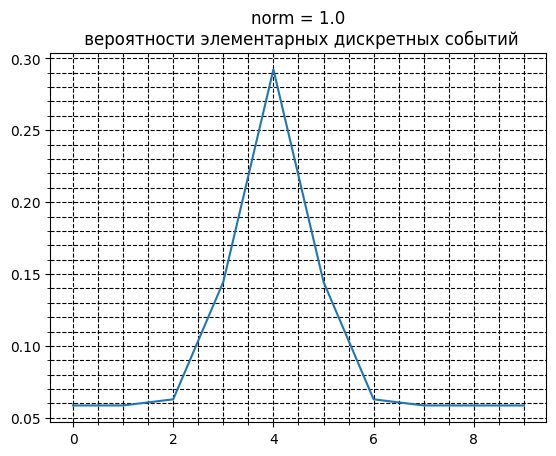

In [360]:
fig,ax = plt.subplots()
x_ = Omega 
y_ = [Proba(i,x_) for i in range(len(x_))]
ax.plot(x_,y_)
ax.set_title(f'norm = {np.sum(y_)}\n вероятности элементарных дискретных событий')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')

# вероятности сопутствующих ошибок

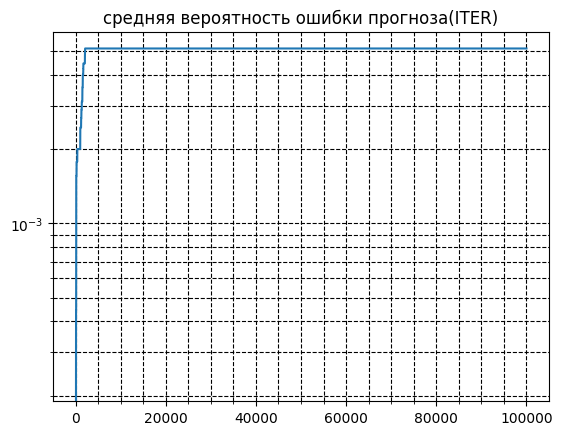

In [361]:
fig,ax = plt.subplots()
ax.plot(iter_number,mean_predict_probas)
ax.set_yscale('log')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')
ax.set_title('средняя вероятность ошибки прогноза(ITER)')
print('')

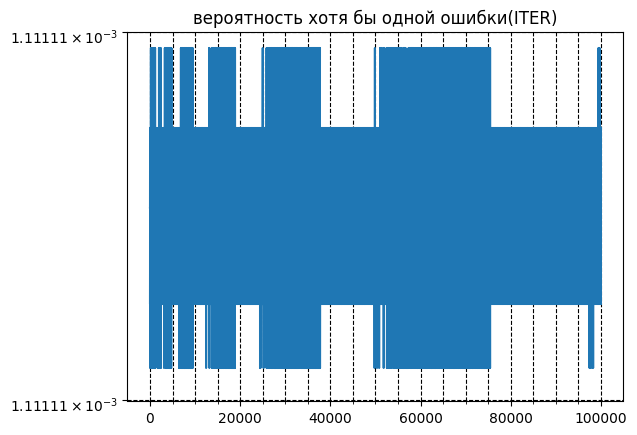

In [364]:
fig,ax = plt.subplots()
ax.plot(iter_number,proba_at_least_one_error)
ax.set_yscale('symlog')
# ax.set_xscale('symlog')
ax.minorticks_on()
ax.grid(which='both', color='k', linestyle='--')
ax.set_title('вероятность хотя бы одной ошибки(ITER)')
print('')

# интервальные оценки вероятностей элементарных событий